In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [15]:
df = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
def count_plot(label):

    ax = sns.countplot(x=label, data=df)
    title_text = label[0].upper() + label[1:]
    # print(title_text)
    plt.title(f"Count of {title_text}")
    # Placing numbers on top of the bars.
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 3, height, ha="center") 
    plt.show()

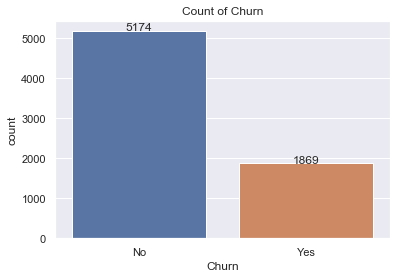

In [17]:
count_plot("Churn")

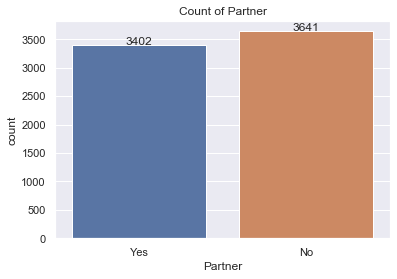

In [18]:
count_plot("Partner")

In [19]:
# Split the data to be balanced for churns and no-churns
churn = df.loc[df["Churn"] == "Yes"]
no_churn = df.loc[df["Churn"] == "No"][:1869]

In [20]:
new_df = pd.concat([churn, no_churn])
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes


In [21]:
for c in new_df.columns: 
    if new_df[c].dtypes == "object":
        lbl = LabelEncoder()
        lbl.fit(list(new_df[c].values))
        new_df[c] = lbl.transform(list(new_df[c].values))

In [22]:
X = new_df.drop(["customerID", "Churn"], axis=1)
y = new_df["Churn"]

# Normalize the data for easier calculations for wide range of numbers.
X = (X - X.mean()) / X.std()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2,0.982891,-0.490049,-0.900461,-0.60715,-1.069306,0.313199,-1.019054,-1.265819,1.591766,1.332764,-0.921836,-0.785305,-1.060958,-1.070608,-0.670878,0.740487,1.363228,-0.498840,-1.656342
4,-1.017134,-0.490049,-0.900461,-0.60715,-1.069306,0.313199,-1.019054,0.215593,-0.773577,-0.905776,-0.921836,-0.785305,-1.060958,-1.070608,-0.670878,0.740487,0.381010,0.089002,-1.246856
5,-1.017134,-0.490049,-0.900461,-0.60715,-0.820265,0.313199,1.077381,0.215593,-0.773577,-0.905776,1.307748,-0.785305,1.129520,1.119232,-0.670878,0.740487,0.381010,1.098976,1.476815
8,-1.017134,-0.490049,1.110245,-0.60715,0.009871,0.313199,1.077381,0.215593,-0.773577,-0.905776,1.307748,1.564011,1.129520,1.119232,-0.670878,0.740487,0.381010,1.278643,-0.292045
13,0.982891,-0.490049,-0.900461,-0.60715,0.881515,0.313199,1.077381,0.215593,-0.773577,1.332764,1.307748,-0.785305,1.129520,1.119232,-0.670878,0.740487,-1.583426,1.240267,0.539723


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

cv_iter = 100
validation_scores = []

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2803, 19)
X_test shape: (935, 19)
y_train shape: (2803,)
y_test shape: (935,)


In [24]:
log_reg = LogisticRegression(max_iter=3000, n_jobs=-1)
log_reg_score = cross_val_score(log_reg, X, y, scoring="roc_auc", cv=cv_iter)
validation_scores.append(log_reg_score)

print("Mean AUC Score - Logistic Regression: ", log_reg_score.mean())

Mean AUC Score - Logistic Regression:  0.8416338360521185


In [25]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_score = cross_val_score(dt_clf, X, y, scoring="roc_auc", cv=cv_iter) 
validation_scores.append(dt_score)

print("Mean AUC Score - Decision Tree: ", dt_score.mean())

Mean AUC Score - Decision Tree:  0.6884937673130193


In [26]:
rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_leaf_nodes=16, n_jobs=-1)
rf_cv_score = cross_val_score(rf_clf, X, y, scoring="roc_auc", cv=cv_iter)
validation_scores.append(rf_cv_score)

print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

Mean AUC Score - Random Forest:  0.8404285506651619


In [27]:
gb_clf = GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=4, max_depth=9)
gb_score = cross_val_score(gb_clf, X, y, scoring="roc_auc", cv=cv_iter)
validation_scores.append(gb_score)

print("Mean AUC Score - Gradient Boost: ", gb_score.mean())

Mean AUC Score - Gradient Boost:  0.8217448958653947


In [28]:
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
rf_features = []
# Get feature_importances of Random Forest for all features
for name, score in zip(X, rf_clf.feature_importances_):
    rf_features.append([score, name])
    
rf_features = sorted(rf_features, reverse=True)
print("Feature importance of Random Forest\n")
for scores in rf_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))

Feature importance of Random Forest

0.3428957 - Contract 
0.1423612 - tenure 
0.1037882 - OnlineSecurity 
0.0834665 - TechSupport 
0.0761877 - InternetService 
0.0687570 - MonthlyCharges 
0.0379724 - PaymentMethod 
0.0305447 - OnlineBackup 
0.0266974 - TotalCharges 
0.0265715 - DeviceProtection 
0.0184351 - PaperlessBilling 
0.0122833 - Dependents 
0.0070565 - StreamingTV 
0.0069434 - SeniorCitizen 
0.0069134 - StreamingMovies 
0.0042988 - Partner 
0.0027025 - MultipleLines 
0.0013381 - gender 
0.0007866 - PhoneService 


In [30]:
# Get feature_importances of Decision Tree for all features
dt_features = []
for name, score in zip(X, dt_clf.feature_importances_):
    dt_features.append([score, name])
    
dt_features = sorted(dt_features, reverse=True)
print("Feature Importance of Decision Tree\n")
for scores in dt_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))  

Feature Importance of Decision Tree

0.2404044 - Contract 
0.2027530 - MonthlyCharges 
0.1617495 - TotalCharges 
0.1237536 - tenure 
0.0356951 - OnlineSecurity 
0.0279149 - PaymentMethod 
0.0270919 - PaperlessBilling 
0.0269583 - OnlineBackup 
0.0246738 - gender 
0.0199362 - InternetService 
0.0177921 - Dependents 
0.0173603 - StreamingMovies 
0.0167284 - SeniorCitizen 
0.0139215 - TechSupport 
0.0133908 - Partner 
0.0104760 - MultipleLines 
0.0089681 - DeviceProtection 
0.0083801 - StreamingTV 
0.0020520 - PhoneService 


In [31]:
# Get feature_importances of Gradient Boost for all features
gb_features = []
for name, score in zip(X, gb_clf.feature_importances_):
    gb_features.append([score, name])
    
gb_features = sorted(gb_features, reverse=True)
print("Feature Importance of Gradient Boost\n")
for scores in gb_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))  

Feature Importance of Gradient Boost

0.2652374 - Contract 
0.1914756 - MonthlyCharges 
0.1700886 - TotalCharges 
0.1213364 - tenure 
0.0343804 - OnlineSecurity 
0.0302814 - PaymentMethod 
0.0216683 - gender 
0.0193014 - TechSupport 
0.0191565 - InternetService 
0.0189069 - PaperlessBilling 
0.0173695 - OnlineBackup 
0.0150365 - DeviceProtection 
0.0140774 - Dependents 
0.0133071 - SeniorCitizen 
0.0131934 - Partner 
0.0125218 - MultipleLines 
0.0107417 - StreamingMovies 
0.0099719 - StreamingTV 
0.0019479 - PhoneService 


<h3>Takeaways: </h3>
    <p>From the listed important features, the Contract given to the customer is the biggest indicator on whether or not the customer will return or not.
    <p>Remake the model but with the Contract column as a one-hot vector to investigate which contract contributes.

In [32]:
ch = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
contracts = ch["Contract"]
contracts = pd.get_dummies(contracts, prefix="Contract")
contracts.head()

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0


In [34]:
ch.drop("Contract", axis=1, inplace=True)
ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,151.65,Yes


In [35]:
new_ch = pd.concat([ch, contracts], axis=1)
new_ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,Mailed check,56.95,1889.5,No,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,Mailed check,53.85,108.15,Yes,1,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,No,Bank transfer (automatic),42.30,1840.75,No,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,Electronic check,70.70,151.65,Yes,1,0,0


In [36]:
new_churn = new_ch.loc[new_ch["Churn"] == "Yes"]
new_no_churn = new_ch.loc[new_ch["Churn"] == "No"][:1869]

In [37]:
new_churn.shape

(1869, 23)

In [38]:
new_ch_df = pd.concat([new_churn, new_no_churn])
new_ch_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Yes,Mailed check,53.85,108.15,Yes,1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,Electronic check,70.70,151.65,Yes,1,0,0
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Electronic check,99.65,820.5,Yes,1,0,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Electronic check,104.80,3046.05,Yes,1,0,0
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,0,0


In [39]:
for c in new_ch_df.columns: 
    if new_ch_df[c].dtypes == "object":
        lbl = LabelEncoder()
        lbl.fit(list(new_ch_df[c].values))
        new_ch_df[c] = lbl.transform(list(new_ch_df[c].values))

In [40]:
X = new_ch_df.drop(["customerID", "Churn"], axis=1)
y = new_ch_df["Churn"]

# Normalize the data for easier calculations for wide range of numbers.
X = (X - X.mean()) / X.std()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year
2,0.982891,-0.490049,-0.900461,-0.60715,-1.069306,0.313199,-1.019054,-1.265819,1.591766,1.332764,...,-0.785305,-1.060958,-1.070608,0.740487,1.363228,-0.498840,-1.656342,0.724965,-0.451883,-0.460441
4,-1.017134,-0.490049,-0.900461,-0.60715,-1.069306,0.313199,-1.019054,0.215593,-0.773577,-0.905776,...,-0.785305,-1.060958,-1.070608,0.740487,0.381010,0.089002,-1.246856,0.724965,-0.451883,-0.460441
5,-1.017134,-0.490049,-0.900461,-0.60715,-0.820265,0.313199,1.077381,0.215593,-0.773577,-0.905776,...,-0.785305,1.129520,1.119232,0.740487,0.381010,1.098976,1.476815,0.724965,-0.451883,-0.460441
8,-1.017134,-0.490049,1.110245,-0.60715,0.009871,0.313199,1.077381,0.215593,-0.773577,-0.905776,...,1.564011,1.129520,1.119232,0.740487,0.381010,1.278643,-0.292045,0.724965,-0.451883,-0.460441
13,0.982891,-0.490049,-0.900461,-0.60715,0.881515,0.313199,1.077381,0.215593,-0.773577,1.332764,...,-0.785305,1.129520,1.119232,0.740487,-1.583426,1.240267,0.539723,0.724965,-0.451883,-0.460441


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

cv_iter = 100

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2803, 21)
X_test shape: (935, 21)
y_train shape: (2803,)
y_test shape: (935,)


In [42]:
rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_leaf_nodes=16, n_jobs=-1)
rf_cv_score = cross_val_score(rf_clf, X, y, scoring="roc_auc", cv=cv_iter)

print("Mean AUC Score - Random Forest: ", rf_cv_score.mean())

Mean AUC Score - Random Forest:  0.8405377295578127


In [43]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_score = cross_val_score(dt_clf, X, y, scoring="roc_auc", cv=cv_iter) 

print("Mean AUC Score - Decision Tree: ", dt_score.mean())

Mean AUC Score - Decision Tree:  0.6902851304674944


In [44]:
gb_clf = GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=4, max_depth=9)
gb_score = cross_val_score(gb_clf, X, y, scoring="roc_auc", cv=cv_iter)

print("Mean AUC Score - Gradient Boost: ", gb_score.mean())

Mean AUC Score - Gradient Boost:  0.8247792483157211


In [45]:
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
rf_features = []
# Get feature_importances of Random Forest for all features
for name, score in zip(X, rf_clf.feature_importances_):
    rf_features.append([score, name])
    
rf_features = sorted(rf_features, reverse=True)
print("Feature importance of Random Forest\n")
for scores in rf_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))

Feature importance of Random Forest

0.2089278 - Contract_Month-to-month 
0.1638971 - tenure 
0.1113783 - OnlineSecurity 
0.1060277 - Contract_Two year 
0.0815289 - TechSupport 
0.0720434 - InternetService 
0.0640045 - MonthlyCharges 
0.0360453 - OnlineBackup 
0.0358901 - Contract_One year 
0.0264100 - TotalCharges 
0.0263340 - DeviceProtection 
0.0258224 - PaymentMethod 
0.0093582 - Dependents 
0.0092268 - PaperlessBilling 
0.0059660 - SeniorCitizen 
0.0059120 - StreamingTV 
0.0046640 - StreamingMovies 
0.0024594 - Partner 
0.0020662 - MultipleLines 
0.0010989 - PhoneService 
0.0009389 - gender 


In [47]:
# Get feature_importances of Gradient Boost for all features
gb_features = []
for name, score in zip(X, gb_clf.feature_importances_):
    gb_features.append([score, name])
    
gb_features = sorted(gb_features, reverse=True)
print("Feature Importance of Gradient Boost\n")
for scores in gb_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))  

Feature Importance of Gradient Boost

0.2554862 - Contract_Month-to-month 
0.1966653 - MonthlyCharges 
0.1729212 - TotalCharges 
0.1184720 - tenure 
0.0348548 - OnlineSecurity 
0.0287673 - PaymentMethod 
0.0203583 - gender 
0.0196011 - TechSupport 
0.0191302 - PaperlessBilling 
0.0184511 - InternetService 
0.0178621 - OnlineBackup 
0.0150206 - Dependents 
0.0130628 - DeviceProtection 
0.0128895 - MultipleLines 
0.0125631 - SeniorCitizen 
0.0121700 - StreamingMovies 
0.0116069 - Partner 
0.0085156 - StreamingTV 
0.0053017 - Contract_One year 
0.0041164 - Contract_Two year 
0.0021837 - PhoneService 


In [48]:
# Get feature_importances of Decision Tree for all features
dt_features = []
for name, score in zip(X, dt_clf.feature_importances_):
    dt_features.append([score, name])
    
dt_features = sorted(dt_features, reverse=True)
print("Feature Importance of Decision Tree\n")
for scores in dt_features:
    print("{:.7f} - {} ".format(scores[0], scores[1]))  

Feature Importance of Decision Tree

0.2338676 - Contract_Month-to-month 
0.1994040 - MonthlyCharges 
0.1552431 - TotalCharges 
0.1249928 - tenure 
0.0368881 - OnlineSecurity 
0.0328439 - PaymentMethod 
0.0245423 - PaperlessBilling 
0.0234437 - gender 
0.0222067 - OnlineBackup 
0.0220462 - SeniorCitizen 
0.0206520 - InternetService 
0.0189837 - Dependents 
0.0149743 - StreamingMovies 
0.0136785 - TechSupport 
0.0131629 - DeviceProtection 
0.0128428 - StreamingTV 
0.0127943 - Partner 
0.0101806 - MultipleLines 
0.0053915 - Contract_Two year 
0.0018611 - Contract_One year 
0.0000000 - PhoneService 


A Month-to-Month contract is the best factor in keeping customers.

(5.049999999999999, 193.95)

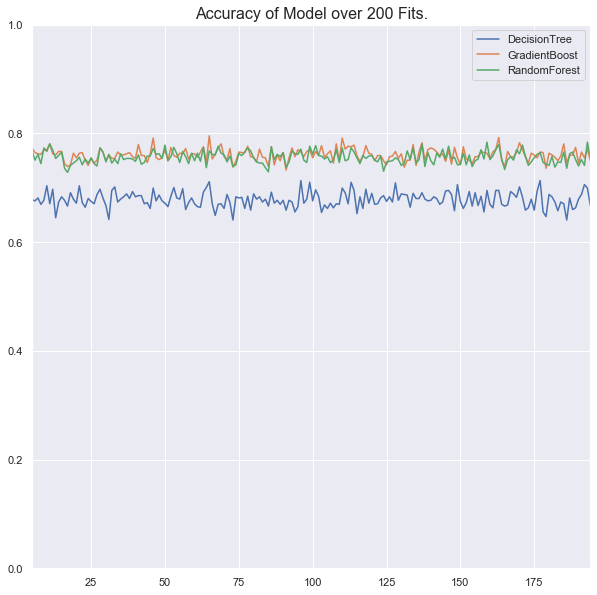

In [57]:
size = 300

np.random.seed(42)
random_states = np.random.randint(500, size=size)

dt_accs = []
gb_accs = []
rf_accs = []

for i in range(len(random_states)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_states[i])
    dt_clf = DecisionTreeClassifier(random_state=42)
    gb_clf = GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=4, max_depth=3)
    rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=3, max_leaf_nodes=16, n_jobs=-1)
    dt_clf.fit(X_train, y_train)
    gb_clf.fit(X_train, y_train)
    rf_clf.fit(X_train, y_train)
    dt_acc = dt_clf.score(X_test, y_test)
    gb_acc = gb_clf.score(X_test, y_test)
    rf_acc = rf_clf.score(X_test, y_test)
    dt_accs.append(dt_acc)
    gb_accs.append(gb_acc)
    rf_accs.append(rf_acc)
    
plt.figure(figsize=(10, 10))
plt.plot(dt_accs, label="DecisionTree")
plt.plot(gb_accs, label="GradientBoost")
plt.plot(rf_accs, label="RandomForest")
plt.ylim([0, 1])
plt.title(f"Accuracy of Model over {size} Fits.", fontsize=16)
plt.legend()
b, t = plt.xlim()
b += 15
t -= 15
plt.xlim(b, t)

In [58]:
print(f"Mean of {size} times of Training.")
print(f"Decision Tree Classifier Mean: {np.mean(np.array(dt_accs)):5.5f}")
print(f"Gradient Boost Classifier Mean: {np.mean(np.array(gb_accs)):5.5f}")
print(f"Random Forest Classifier Mean: {np.mean(np.array(rf_accs)):5.5f}")

Mean of 200 times of Training.
Decision Tree Classifier Mean: 0.67828
Gradient Boost Classifier Mean: 0.76072
Random Forest Classifier Mean: 0.75610
